In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boostcourse/부스트코스 프로젝트/수사기관사칭형.csv")
df_s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boostcourse/부스트코스 프로젝트/대출사기형.csv")
df_s.head()



,Unnamed: 0,대출사기형 사례
0,0,KB저축은행입니다. 핸드폰 어떤거 사용하세요?
1,1,우리은행 직원인데요 영업점에선 절 모를수도있어요
2,2,KB저축은행인데요 카카오톡친구추천부탁드립니다
3,3,영업점에선 절 모를수도있어요(...???)
4,4,OO캐피탈입니다. 심사결과 확인되어서 연락드렸습니다.


In [47]:
new_df = df.drop(["Unnamed: 0"], axis=1)
new_df_s = df_s.drop(["Unnamed: 0"], axis=1)
new_df_s

,대출사기형 사례
0,KB저축은행입니다. 핸드폰 어떤거 사용하세요?
1,우리은행 직원인데요 영업점에선 절 모를수도있어요
2,KB저축은행인데요 카카오톡친구추천부탁드립니다
3,영업점에선 절 모를수도있어요(...???)
4,OO캐피탈입니다. 심사결과 확인되어서 연락드렸습니다.
...,...
180,이벤트행사 통장 한개당 300만원 제안
181,취업빙자 통장편취사기
182,금감원 은행조사관 사칭 명의도용 사건
183,시티캐피탈사칭


In [49]:
import re
new_df["수사기관 사칭형"] =  [re.sub('[^0-9가-힣]', '', s) for s in df["수사기관 사칭형"]]
new_df_s["대출사기형 사례"] =  [re.sub('[^0-9가-힣]', '', s) for s in df_s["대출사기형 사례"]]
new_df_s.tail(40)

,대출사기형 사례
145,음성안내에대해대출상담을신청하자시중은행을사칭
146,실제대출광고인것처럼를이용하여대출영업
147,대출처리를위해인지세납부후인지증서를받아세무서에가면환급해준다고함
148,기존대출금일부를변제해야저금리로대출이가능
149,경매대행업체를사칭하여대포통장및인출책모집
150,택배업체를사칭하여대포통장및인출책모집
151,저축은행햇살론안내센터라며대출권유
152,서류필요없는카드대출을권유하면서회사를밝히지않음
153,우리금융사칭금융지주회사는대출을하지않음
154,제일저축은행을사칭하면서방문상담을하지않도록유도


In [6]:
!pip3 install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-02-02 14:28:48--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0

In [7]:
from konlpy.tag import Okt  
from collections import Counter

In [8]:
#리스트로 변환
Data_list=new_df["수사기관 사칭형"].values.tolist()

okt = Okt()

# 리스트를 요소별로 가져와서 명사만 추출한 후 리스트로 저장
data_word=[]
for i in range(len(Data_list)):
    try:
        data_word.append(okt.nouns(Data_list[i]))
    except Exception as e:
        continue

#  명사만 추출해서 만든 리스트
data_word

print(type(data_word))

<class 'list'>


In [50]:
#리스트로 변환
Data_list_s =new_df_s["대출사기형 사례"].values.tolist()

okt = Okt()

# 리스트를 요소별로 가져와서 명사만 추출한 후 리스트로 저장
data_word_s=[]
for i in range(len(Data_list_s)):
    try:
        data_word_s.append(okt.nouns(Data_list_s[i]))
    except Exception as e:
        continue

#  명사만 추출해서 만든 리스트
data_word_s

print(type(data_word_s))

<class 'list'>


In [9]:
from konlpy.tag import Okt
from collections import Counter

In [10]:
import pandas as pd

In [51]:
lst_a = sum(data_word, [])
count_items = Counter(lst_a)
c1 = count_items.most_common(30)
print("c1", c1)

lst_s = sum(data_word_s, [])
count_items_s = Counter(lst_s)
c2 = count_items_s.most_common(30)
print("c2", c2)

c1 [('사칭', 40), ('본인', 31), ('사건', 27), ('금융', 25), ('사기', 19), ('피해자', 19), ('연락', 17), ('단계', 17), ('사관', 16), ('명의', 15), ('조사', 14), ('확인', 13), ('계좌', 13), ('직원', 12), ('은행', 12), ('도용', 11), ('중앙', 11), ('검', 11), ('대포통장', 11), ('시나리오', 11), ('범죄수사', 10), ('검찰', 10), ('기관', 10), ('검거', 10), ('불법', 9), ('하의', 9), ('발견', 9), ('연루', 8), ('통화', 8), ('녹', 8)]
c2 [('대출', 104), ('고객', 43), ('상환', 40), ('계좌', 30), ('진행', 18), ('통장', 17), ('금융', 17), ('캐피탈', 16), ('모집', 15), ('사기', 15), ('은행', 15), ('저희', 14), ('대포통장', 14), ('연락', 13), ('처리', 13), ('금리', 13), ('자금', 13), ('직원', 12), ('심사', 12), ('위해', 12), ('신용', 12), ('저축은행', 11), ('상품', 11), ('책', 11), ('입금', 11), ('기존', 11), ('피해자', 11), ('사칭', 11), ('발급', 10), ('때문', 10)]


In [36]:
!pip install koreanize-matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import pandas as pd
import koreanize_matplotlib
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


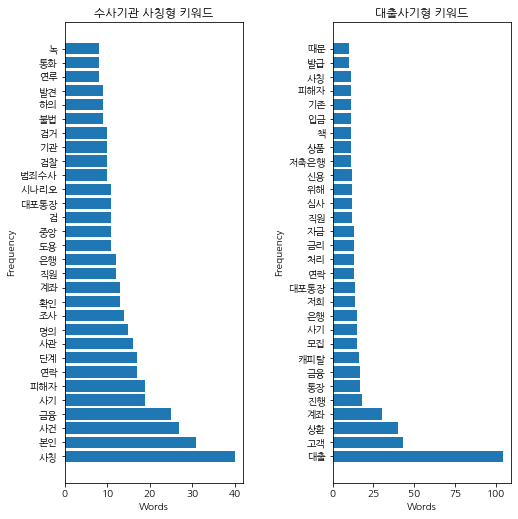

In [76]:
labels, values = zip(*c1)
labels_s, values_s = zip(*c2)
fig = plt.figure(figsize=(8,8))


plt.subplot(121)
plt.barh(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('수사기관 사칭형 키워드')


plt.subplot(1,2,2)
plt.barh(labels_s, values_s)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('대출사기형 키워드')
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.5, hspace=0.35)

plt.show()


In [44]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 4 not upgraded.
Need to get 37.6 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum-extra all 20180306-3 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9

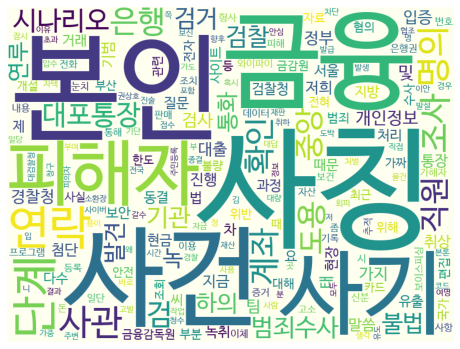

In [45]:
wc = WordCloud(fontpath, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(count_items)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

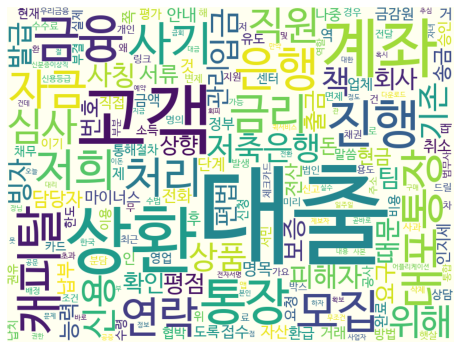

In [77]:
wc = WordCloud(fontpath, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(count_items_s)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()